Load the preprocessed data(new.csv)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [2]:
data = np.genfromtxt('new.csv',delimiter=",",skiprows=1)
data.shape

(17545, 6)

In [3]:
import time
start = time.time()

X=data[:,3:5]
y=data[:,5]
# instantiate a logistic regression model, and fit with X and y
model = RandomForestClassifier()
model = model.fit(X, y)

# check the accuracy on the training set
print model.score(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
predicted = model2.predict(X_test)

end = time.time()
elapsed = end - start
print elapsed

0.990880592761
0.28874707222


In [4]:
y.mean()

0.080535765175263604

In [5]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [6]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print predicted

[ 0.  0.  0. ...,  0.  0.  0.]


In [7]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print probs

[[ 1.   0. ]
 [ 0.9  0.1]
 [ 1.   0. ]
 ..., 
 [ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]]


In [8]:
# generate evaluation metrics
print metrics.accuracy_score(y_test, predicted)

0.92344224924


In [9]:
print metrics.confusion_matrix(y_test, predicted)
print metrics.classification_report(y_test, predicted)

[[4739  105]
 [ 298  122]]
             precision    recall  f1-score   support

        0.0       0.94      0.98      0.96      4844
        1.0       0.54      0.29      0.38       420

avg / total       0.91      0.92      0.91      5264



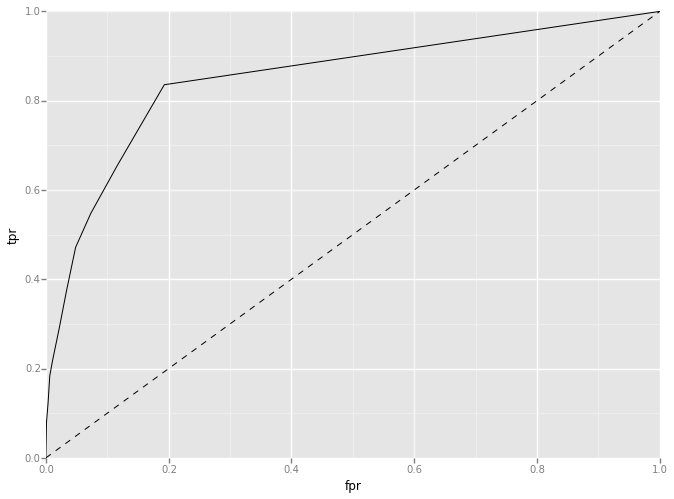

<ggplot: (281016977)>

In [10]:
from sklearn import metrics
import pandas as pd
from ggplot import *

fpr, tpr, _ = metrics.roc_curve(y_test, probs[:,1])

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')

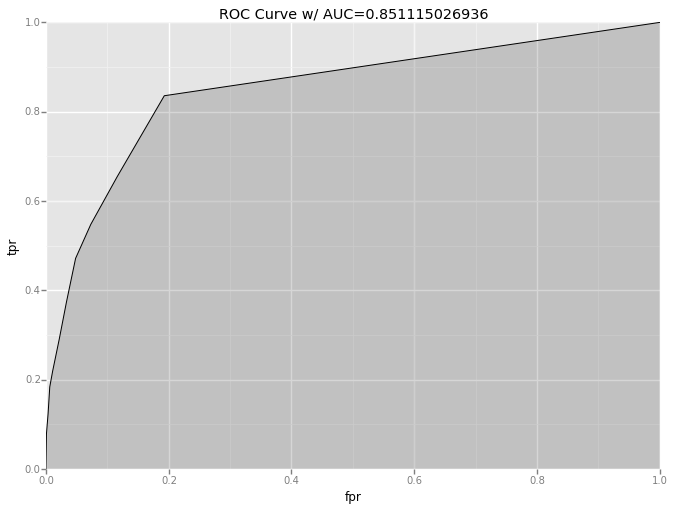

<ggplot: (278967017)>

In [11]:
auc = metrics.auc(fpr,tpr)
ggplot(df, aes(x='fpr', ymin=0, ymax='tpr')) +\
    geom_area(alpha=0.2) +\
    geom_line(aes(y='tpr')) +\
    ggtitle("ROC Curve w/ AUC=%s" % str(auc))

In [12]:
print metrics.roc_auc_score(y_test, probs[:, 1])

0.851115026936


In [13]:
probs.shape

(5264, 2)

In [14]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(RandomForestClassifier(), X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.8690205   0.90034169  0.89173789  0.91163056  0.92759407  0.87571266
  0.89737742  0.90935006  0.91334094  0.88654504]
0.898265081969


Feature importance analysis

In [15]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)

print(model.feature_importances_)

[ 0.53263624  0.46736376]


Select zone co2 and zone temp as major feature

In [16]:
occ_index = np.nonzero(y)

In [17]:
print occ_index

(array([   66,    67,    68, ..., 17470, 17471, 17472]),)


In [18]:
un_index = np.delete(np.array(range(0,17545)),occ_index)

In [19]:
print un_index

[    0     1     2 ..., 17542 17543 17544]


In [20]:
plt.figure(figsize=(15,10))
plt.scatter(X[occ_index,3],X[occ_index,4],color='r')
plt.scatter(X[un_index,3],X[un_index,4],color='b')

IndexError: index 3 is out of bounds for axis 1 with size 2